In [ ]:
!nvidia-smi
!nvcc -V

Thu Oct  6 18:00:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import cv2
import librosa
import pandas as pd 
import numpy as np
import tqdm 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/UrbanSound8K/metadata

/content/gdrive/MyDrive/UrbanSound8K/metadata


In [ ]:
!ls

UrbanSound8K.csv


In [ ]:
#!tar -xzvf "UrbanSound8K.tar.gz"

In [ ]:
df = pd.read_csv('UrbanSound8K.csv')

In [ ]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


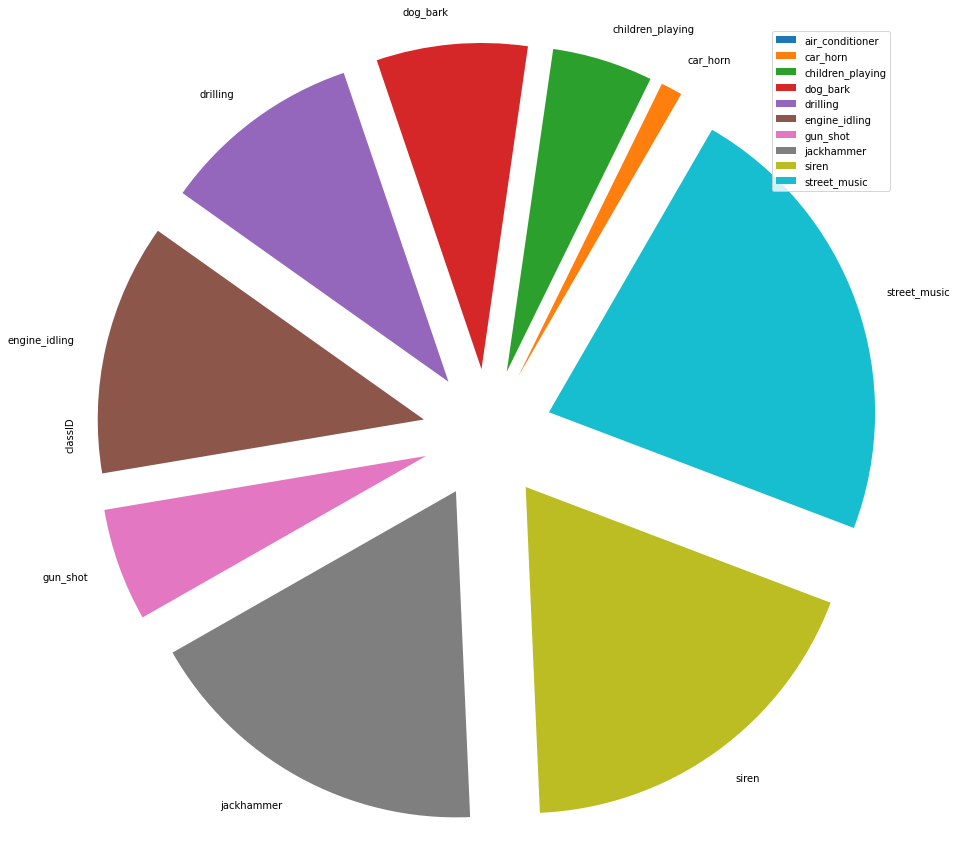

In [ ]:
explode = (0.2, 0.2, 0.2, 0.2,0.2, 0.2, 0.2, 0.2,0.2, 0.2) 
df.groupby(['class']).sum().plot(kind='pie', y='classID',startangle=60,pctdistance=5.1, labeldistance=1.1,explode=explode,figsize=(15,15))

In [ ]:
df["salience"].unique() #belirginlik

array([1, 2])

In [ ]:
def extract_feature(file_path):
  audio,sample_rate = librosa.load(file_path,res_type='kaiser_fast')
  spec = librosa.feature.mfcc(y=audio,sr=sample_rate) 
  spec_cony = librosa.amplitude_to_db(spec, ref=np.max) 
  scaled_feature = np.mean(spec_cony.T,axis=0)
  normalized_feature = preprocessing.minmax_scale(scaled_feature)
  return normalized_feature

In [ ]:
%cd ..

/content/gdrive/MyDrive/UrbanSound8K


In [ ]:
fold=5
name="100032-3-0-0.wav"
path=f"audio/fold{fold}/{name}"
extract_feature(path)

array([9.9999994e-01, 7.5367975e-01, 9.2535901e-01, 6.8857473e-01,
       3.8730288e-01, 3.8152748e-01, 2.2929060e-01, 3.7296689e-01,
       3.3009410e-02, 3.1196690e-01, 3.2675332e-01, 0.0000000e+00,
       3.6786997e-01, 2.4934173e-01, 2.3050189e-02, 4.9532652e-03,
       4.0458208e-01, 8.5365772e-04, 7.2633028e-02, 1.7787051e-01],
      dtype=float32)

In [ ]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
"""
labels=[]
for index_num,row in df.iterrows():
  name=row["slice_file_name"]
  fold=row["fold"]
  path=f"audio/fold{fold}/{name}"
  print(index_num)
  dat1, sampling_rate1 = librosa.load(path)
  feature=extract_feature(path)
  labels.append([feature,row["class"]])

"""


'\nlabels=[]\nfor index_num,row in df.iterrows():\n  name=row["slice_file_name"]\n  fold=row["fold"]\n  path=f"audio/fold{fold}/{name}"\n  print(index_num)\n  dat1, sampling_rate1 = librosa.load(path)\n  feature=extract_feature(path)\n  labels.append([feature,row["class"]])\n\n'

In [ ]:
"""
extracted_df = pd.DataFrame(labels,columns=['feature','class'])

# display first fivve rows of the dataframe
extracted_df.head()
extracted_df.to_csv("extracted_df.csv")
"""

'\nextracted_df = pd.DataFrame(labels,columns=[\'feature\',\'class\'])\n\n# display first fivve rows of the dataframe\nextracted_df.head()\nextracted_df.to_csv("extracted_df.csv")\n'

In [ ]:
extracted_df=pd.read_csv("extracted_df.csv")

In [ ]:
extracted_df

,Unnamed: 0,feature,class
0,0,[9.9999994e-01 7.5367975e-01 9.2535901e-01 6.8...,dog_bark
1,1,[1. 0.7223865 0.56764567 0.6013166 0...,children_playing
2,2,[1. 0.73758954 0.5444557 0.56031173 0...,children_playing
3,3,[1. 0.68863904 0.426674 0.53967434 0...,children_playing
4,4,[0.99999994 0.7325834 0.578877 0.60740143 0...,children_playing
...,...,...,...
8727,8727,[1. 0.7830202 0.58318514 0.5133966 0...,car_horn
8728,8728,[0.99999994 0.7023515 0.5899351 0.606835 0...,car_horn
8729,8729,[1. 0.76614255 0.58644474 0.53276306 0...,car_horn
8730,8730,[0.99999994 0.7910475 0.61657596 0.52089477 0...,car_horn


In [ ]:
extracted_df['feature']=extracted_df['feature'].str.replace("\n","")

In [ ]:

x=[]
Y=[]
for index,row in extracted_df.iterrows():
  list_of_integers = list(map(float, np.asarray(row['feature'].strip("[").strip("]").split())))
  
  x.append(np.asarray(list_of_integers))
  Y.append(row['class'])


In [ ]:
x=np.asarray(x)
Y=np.asarray(Y)

In [ ]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8732 non-null   int64 
 1   feature     8732 non-null   object
 2   class       8732 non-null   object
dtypes: int64(1), object(2)
memory usage: 204.8+ KB


In [ ]:
x

array([[9.9999994e-01, 7.5367975e-01, 9.2535901e-01, ..., 8.5365772e-04,
        7.2633028e-02, 1.7787051e-01],
       [1.0000000e+00, 7.2238650e-01, 5.6764567e-01, ..., 2.0551407e-01,
        1.3491052e-01, 1.2729698e-01],
       [1.0000000e+00, 7.3758954e-01, 5.4445570e-01, ..., 6.6820320e-02,
        4.8623680e-02, 2.4974936e-01],
       ...,
       [1.0000000e+00, 7.6614255e-01, 5.8644474e-01, ..., 1.4125037e-01,
        2.1325469e-01, 0.0000000e+00],
       [9.9999994e-01, 7.9104750e-01, 6.1657596e-01, ..., 1.4472115e-01,
        1.0814518e-01, 5.6410430e-02],
       [1.0000000e+00, 7.4602944e-01, 5.4674520e-01, ..., 4.1212636e-01,
        3.5268310e-02, 1.7636311e-01]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = to_categorical(le.fit_transform(Y))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state = 42)

print("Number of training samples = ", x_train.shape[0])
print("Number of testing samples = ",x_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


In [ ]:
x_train[0].shape



(20,)

In [ ]:

model = Sequential()

model.add(tf.keras.layers.Conv1D(32,3, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 18, 32)            128       
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               73856     
                                                                 
 activation_24 (Activation)  (None, 128)               0         
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 activation_25 (Activation)  (None, 128)              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam( lr=1e-3),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Epoch 1/300
110/110 [==============================] - 1s 6ms/step - loss: 2.1556 - accuracy: 0.1791 - val_loss: 1.8606 - val_accuracy: 0.3005
Epoch 2/300
110/110 [==============================] - 0s 4ms/step - loss: 1.8506 - accuracy: 0.3105 - val_loss: 1.6643 - val_accuracy: 0.3898
Epoch 3/300
110/110 [==============================] - 1s 5ms/step - loss: 1.7324 - accuracy: 0.3602 - val_loss: 1.5670 - val_accuracy: 0.4493
Epoch 4/300
110/110 [==============================] - 0s 4ms/step - loss: 1.6383 - accuracy: 0.4024 - val_loss: 1.4904 - val_accuracy: 0.4705
Epoch 5/300
110/110 [==============================] - 1s 5ms/step - loss: 1.5682 - accuracy: 0.4286 - val_loss: 1.4286 - val_accuracy: 0.4860
Epoch 6/300
110/110 [==============================] - 0s 4ms/step - loss: 1.5378 - accuracy: 0.4498 - val_loss: 1.4009 - val_accuracy: 0.5077
Epoch 7/300
110/110 [==============================] - 0s 4ms/step - loss: 1.5025 - accuracy: 0.4596 - val_loss: 1.3566 - val_accuracy: 0.5283

In [ ]:

'''
grid search yapmaya calistik fakat basarisiz sonuclandi

from tensorboard.plugins.hparams import api as hp
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32,64]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_kernel_size = hp.HParam('kernel_size', hp.Discrete([2, 3, 4]))
HP_filters = hp.HParam('filters', hp.Discrete([16, 32, 64]))

METRIC_ACCURACY = 'accuracy'

hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER,HP_kernel_size,HP_filters]
metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')]
'''

In [ ]:

model = Sequential()

model.add(tf.keras.layers.Conv1D(32,3, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(48))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 18, 32)            128       
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                36928     
                                                                 
 activation_28 (Activation)  (None, 64)                0         
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 48)                3120      
                                                                 
 activation_29 (Activation)  (None, 48)              

In [ ]:
model.compile(optimizer="SGD",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Epoch 1/300
110/110 [==============================] - 1s 5ms/step - loss: 2.2866 - accuracy: 0.1236 - val_loss: 2.2695 - val_accuracy: 0.2009
Epoch 2/300
110/110 [==============================] - 0s 4ms/step - loss: 2.2645 - accuracy: 0.1384 - val_loss: 2.2499 - val_accuracy: 0.1626
Epoch 3/300
110/110 [==============================] - 1s 5ms/step - loss: 2.2507 - accuracy: 0.1529 - val_loss: 2.2348 - val_accuracy: 0.1883
Epoch 4/300
110/110 [==============================] - 0s 4ms/step - loss: 2.2381 - accuracy: 0.1676 - val_loss: 2.2184 - val_accuracy: 0.2106
Epoch 5/300
110/110 [==============================] - 0s 4ms/step - loss: 2.2221 - accuracy: 0.1762 - val_loss: 2.1964 - val_accuracy: 0.2181
Epoch 6/300
110/110 [==============================] - 0s 4ms/step - loss: 2.1981 - accuracy: 0.1930 - val_loss: 2.1640 - val_accuracy: 0.2215
Epoch 7/300
110/110 [==============================] - 0s 4ms/step - loss: 2.1658 - accuracy: 0.2126 - val_loss: 2.1235 - val_accuracy: 0.2335

In [ ]:

model = Sequential()

model.add(tf.keras.layers.Conv1D(32,3, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(48))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 18, 32)            128       
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                36928     
                                                                 
 activation_32 (Activation)  (None, 64)                0         
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 48)                3120      
                                                                 
 activation_33 (Activation)  (None, 48)              

In [ ]:
model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Epoch 1/300
110/110 [==============================] - 1s 6ms/step - loss: 2.1646 - accuracy: 0.1768 - val_loss: 1.9067 - val_accuracy: 0.2902
Epoch 2/300
110/110 [==============================] - 0s 4ms/step - loss: 1.8795 - accuracy: 0.2966 - val_loss: 1.7036 - val_accuracy: 0.3910
Epoch 3/300
110/110 [==============================] - 0s 4ms/step - loss: 1.7240 - accuracy: 0.3602 - val_loss: 1.5790 - val_accuracy: 0.4339
Epoch 4/300
110/110 [==============================] - 0s 4ms/step - loss: 1.6467 - accuracy: 0.4052 - val_loss: 1.5355 - val_accuracy: 0.4574
Epoch 5/300
110/110 [==============================] - 1s 5ms/step - loss: 1.6097 - accuracy: 0.4133 - val_loss: 1.4630 - val_accuracy: 0.4917
Epoch 6/300
110/110 [==============================] - 0s 4ms/step - loss: 1.5488 - accuracy: 0.4411 - val_loss: 1.4308 - val_accuracy: 0.4997
Epoch 7/300
110/110 [==============================] - 0s 4ms/step - loss: 1.5094 - accuracy: 0.4606 - val_loss: 1.4001 - val_accuracy: 0.5117

In [ ]:

model = Sequential()
                                #filter sayisi #kernel_size
model.add(tf.keras.layers.Conv1D(64,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              #noron sayisi
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#dropoutlar 0 ile 1 arasinda olcak
model.add(Dense(48))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            #burayi degistirmeyin
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 32

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 19, 64)            192       
                                                                 
 flatten_7 (Flatten)         (None, 1216)              0         
                                                                 
 dense_45 (Dense)            (None, 32)                38944     
                                                                 
 activation_36 (Activation)  (None, 32)                0         
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 48)                1584      
                                                                 
 activation_37 (Activation)  (None, 48)              

In [ ]:
                  #optimizer cesitle
model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
num_epochs = 300
num_batch_size = 32

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Epoch 1/300
219/219 [==============================] - 2s 5ms/step - loss: 2.1005 - accuracy: 0.1954 - val_loss: 1.8473 - val_accuracy: 0.2770
Epoch 2/300
219/219 [==============================] - 1s 4ms/step - loss: 1.8790 - accuracy: 0.2777 - val_loss: 1.7618 - val_accuracy: 0.3017
Epoch 3/300
219/219 [==============================] - 1s 4ms/step - loss: 1.8162 - accuracy: 0.3011 - val_loss: 1.6886 - val_accuracy: 0.3652
Epoch 4/300
219/219 [==============================] - 1s 4ms/step - loss: 1.7661 - accuracy: 0.3380 - val_loss: 1.6428 - val_accuracy: 0.4184
Epoch 5/300
219/219 [==============================] - 1s 4ms/step - loss: 1.7259 - accuracy: 0.3611 - val_loss: 1.5963 - val_accuracy: 0.4173
Epoch 6/300
219/219 [==============================] - 1s 4ms/step - loss: 1.6908 - accuracy: 0.3759 - val_loss: 1.5826 - val_accuracy: 0.4236
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 1.6807 - accuracy: 0.3857 - val_loss: 1.5273 - val_accuracy: 0.4602

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') =< 0.6 and logs.get('epoch')==100): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [67]:

model = Sequential()
                                #filter sayisi #kernel_size
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              #noron sayisi
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#dropoutlar 0 ile 1 arasinda olcak
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            #burayi degistirmeyin
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 32

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_8 (Flatten)         (None, 304)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                19520     
                                                                 
 activation_40 (Activation)  (None, 64)                0         
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 activation_41 (Activation)  (None, 128)             

In [68]:
model = Sequential()
                                #filter sayisi #kernel_size
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              #noron sayisi
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#dropoutlar 0 ile 1 arasinda olcak
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            #burayi degistirmeyin
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_9 (Flatten)         (None, 304)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                19520     
                                                                 
 activation_44 (Activation)  (None, 64)                0         
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 128)               8320      
                                                                 
 activation_45 (Activation)  (None, 128)             

In [69]:
model = Sequential()
                                #filter sayisi #kernel_size
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              #noron sayisi
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#dropoutlar 0 ile 1 arasinda olcak
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            #burayi degistirmeyin
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 256

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_10 (Flatten)        (None, 304)               0         
                                                                 
 dense_60 (Dense)            (None, 64)                19520     
                                                                 
 activation_48 (Activation)  (None, 64)                0         
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 128)               8320      
                                                                 
 activation_49 (Activation)  (None, 128)             

In [70]:
model = Sequential()
                                #filter sayisi #kernel_size
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              #noron sayisi
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#dropoutlar 0 ile 1 arasinda olcak
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            #burayi degistirmeyin
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 128

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_11 (Flatten)        (None, 304)               0         
                                                                 
 dense_65 (Dense)            (None, 64)                19520     
                                                                 
 activation_52 (Activation)  (None, 64)                0         
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_66 (Dense)            (None, 128)               8320      
                                                                 
 activation_53 (Activation)  (None, 128)             

In [71]:
model = Sequential()
                               
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))


model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_12 (Flatten)        (None, 304)               0         
                                                                 
 dense_70 (Dense)            (None, 128)               39040     
                                                                 
 activation_56 (Activation)  (None, 128)               0         
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 activation_57 (Activation)  (None, 128)             

In [72]:
model = Sequential()
                                
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_13 (Flatten)        (None, 304)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                19520     
                                                                 
 activation_60 (Activation)  (None, 64)                0         
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 128)               8320      
                                                                 
 activation_61 (Activation)  (None, 128)             

In [73]:
model = Sequential()
                                
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))

            
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 300
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_14 (Flatten)        (None, 304)               0         
                                                                 
 dense_80 (Dense)            (None, 64)                19520     
                                                                 
 activation_64 (Activation)  (None, 64)                0         
                                                                 
 dropout_48 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 128)               8320      
                                                                 
 activation_65 (Activation)  (None, 128)             

In [74]:
model = Sequential()
                                
model.add(tf.keras.layers.Conv1D(16,2, activation ='relu', input_shape= (20, 1)))
model.add(tf.keras.layers.Flatten())
              
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))

            
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer="Adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

num_epochs = 500
num_batch_size = 64

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=[callbacks]
         )

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 19, 16)            48        
                                                                 
 flatten_15 (Flatten)        (None, 304)               0         
                                                                 
 dense_85 (Dense)            (None, 128)               39040     
                                                                 
 activation_68 (Activation)  (None, 128)               0         
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_86 (Dense)            (None, 128)               16512     
                                                                 
 activation_69 (Activation)  (None, 128)             

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }

param_grid = dict(epochs=[500,1000,2000])
grid_search_cv=GridSearchCV(model,param_grid,verbose=1,cv=3,scoring=scorers,refit="precision_score")
grid_result = grid_search_cv.fit(x, Y)
"""

In [ ]:
"""
import math
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
	initial_lrate = 0.008
	drop = 0.5
	epochs_drop = 5.0
	lrate = 0.00001
	return lrate      

opt = Adam(lr=0.001)                                     # 0.0 here signifies this is not to be used
lrate = LearningRateScheduler(step_decay)
print(lrate)
callbacks_list = [lrate]

num_epochs = 1000
num_batch_size = 128

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
          callbacks=callbacks_list
         )
"""

Epoch 1/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.7082 - accuracy: 0.7496 - val_loss: 0.6190 - val_accuracy: 0.7871 - lr: 1.0000e-05
Epoch 2/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.6960 - accuracy: 0.7593 - val_loss: 0.6190 - val_accuracy: 0.7859 - lr: 1.0000e-05
Epoch 3/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.7502 - val_loss: 0.6190 - val_accuracy: 0.7859 - lr: 1.0000e-05
Epoch 4/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.7063 - accuracy: 0.7552 - val_loss: 0.6188 - val_accuracy: 0.7859 - lr: 1.0000e-05
Epoch 5/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.7473 - val_loss: 0.6188 - val_accuracy: 0.7865 - lr: 1.0000e-05
Epoch 6/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.7089 - accuracy: 0.7539 - val_loss: 0.6187 - val_accuracy: 0.7865 - lr: 1.0000e-05
Epoch 7/1000
55/55 [=========================